In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file="heart_failure_clinical_records_dataset.csv"
df=pd.read_csv(file)

In [4]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
# Define age bins and labels
bins = [40, 50, 60, 70,80,90,100]  # 40–44, 45–49, 50–54
labels = ['40-49', '50-59', '60-69','70-79','80-89','90-99']

In [6]:
# Assign age groups
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [7]:
# Create frequency table
age_distribution = df['age_group'].value_counts().sort_index()
print("Age Distribution Table:\n")
print(age_distribution)

Age Distribution Table:

age_group
40-49    47
50-59    82
60-69    93
70-79    52
80-89    19
90-99     6
Name: count, dtype: int64


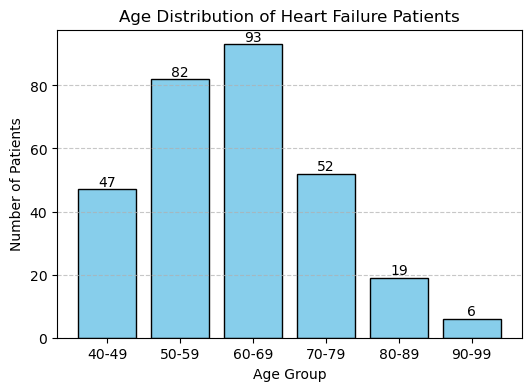

In [8]:
# Plot histogram with labels
plt.figure(figsize=(6,4))
counts = age_distribution.values
plt.bar(age_distribution.index, counts, color='skyblue', edgecolor='black')

# Add count labels on top of bars
for i, count in enumerate(counts):
    plt.text(i, count, count, ha='center', va='bottom', fontsize=10)

plt.title('Age Distribution of Heart Failure Patients')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
# Calculate death rate per age group
death_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100
print("Death Rate by Age Group (%):\n")
print(death_rate)

Death Rate by Age Group (%):

age_group
40-49    23.404255
50-59    24.390244
60-69    29.032258
70-79    38.461538
80-89    68.421053
90-99    83.333333
Name: DEATH_EVENT, dtype: float64


C:\Users\shiva\AppData\Local\Temp\ipykernel_29444\1109785463.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100


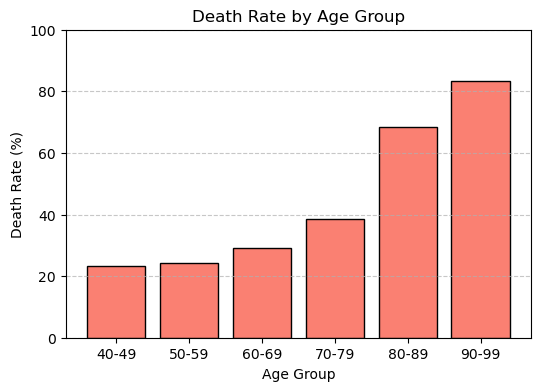

In [10]:
# Plot
plt.figure(figsize=(6,4))
plt.bar(death_rate.index, death_rate.values, color='salmon', edgecolor='black')
plt.title('Death Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

What is the percentage of male and female patients in the dataset

In [11]:
# Count males and females
sex_counts = df['sex'].value_counts()

In [12]:
# Calculate percentages
sex_percent = (sex_counts / sex_counts.sum()) * 100

In [13]:
# Map 0/1 to Female/Male
sex_percent.index = sex_percent.index.map({0: 'Female', 1: 'Male'})

In [14]:
print("Percentage of Male and Female Patients:\n")
print(sex_percent)

Percentage of Male and Female Patients:

sex
Male      64.882943
Female    35.117057
Name: count, dtype: float64


How does the platelet count vary among different age groups

In [15]:
# Calculate mean platelet count per age group
platelet_stats = df.groupby('age_group')['platelets'].mean()
print("Average Platelet Count by Age Group:\n")
print(platelet_stats)

Average Platelet Count by Age Group:

age_group
40-49    285931.705319
50-59    265001.807073
60-69    248990.840645
70-79    267036.349038
80-89    252248.213684
90-99    290059.671667
Name: platelets, dtype: float64


C:\Users\shiva\AppData\Local\Temp\ipykernel_29444\1075050813.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platelet_stats = df.groupby('age_group')['platelets'].mean()


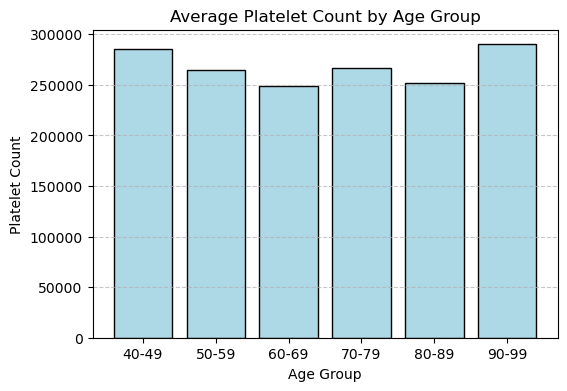

In [16]:
# Bar chart for mean values
plt.figure(figsize=(6,4))
plt.bar(platelet_stats.index, platelet_stats.values, color='lightblue', edgecolor='black')
plt.title('Average Platelet Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 600x400 with 0 Axes>

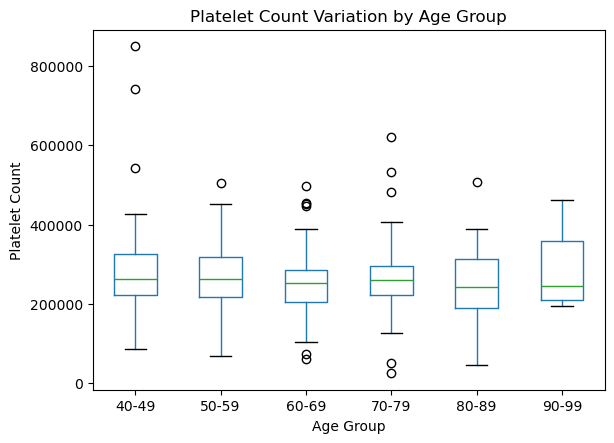

In [17]:
# Boxplot to show variation
plt.figure(figsize=(6,4))
df.boxplot(column='platelets', by='age_group', grid=False)
plt.title('Platelet Count Variation by Age Group')
plt.suptitle('')  # remove extra title
plt.xlabel('Age Group')
plt.ylabel('Platelet Count')
plt.show()

 Is there a correlation between creatinine and sodium levels in the blood

Correlation between serum creatinine and sodium: -0.19


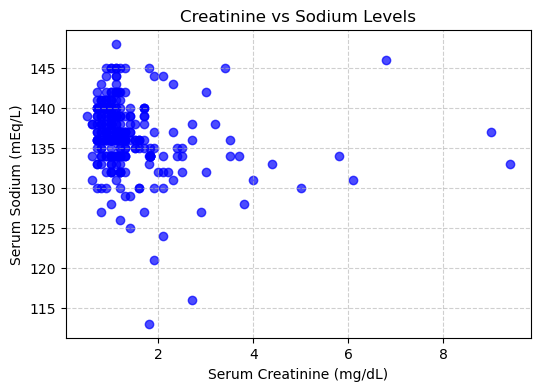

In [18]:
# Compute correlation
correlation = df['serum_creatinine'].corr(df['serum_sodium'])
print(f"Correlation between serum creatinine and sodium: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(df['serum_creatinine'], df['serum_sodium'], color='blue', alpha=0.7)
plt.title('Creatinine vs Sodium Levels')
plt.xlabel('Serum Creatinine (mg/dL)')
plt.ylabel('Serum Sodium (mEq/L)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

 How does the prevalence of high blood pressure differ between male and female patients

In [19]:
# Group by sex and calculate prevalence (mean)
bp_prevalence = df.groupby('sex')['high_blood_pressure'].mean() * 100

In [20]:
# Map sex labels
bp_prevalence.index = bp_prevalence.index.map({0: 'Female', 1: 'Male'})

print("Prevalence of High Blood Pressure (%):\n")
print(bp_prevalence)

Prevalence of High Blood Pressure (%):

sex
Female    41.904762
Male      31.443299
Name: high_blood_pressure, dtype: float64


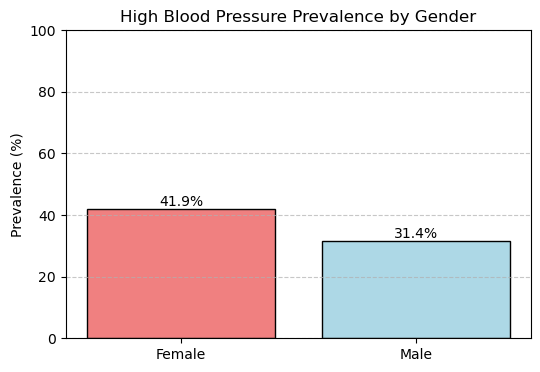

In [21]:
# --- Visualization ---
plt.figure(figsize=(6,4))
plt.bar(bp_prevalence.index, bp_prevalence.values, color=['lightcoral','lightblue'], edgecolor='black')
plt.title('High Blood Pressure Prevalence by Gender')
plt.ylabel('Prevalence (%)')
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
for i, val in enumerate(bp_prevalence.values):
    plt.text(i, val, f"{val:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()

What is the relationship between smoking habits and the occurrence of heart failure

In [22]:
from scipy.stats import chi2_contingency

In [23]:
# --- Death rate by smoking status ---
death_rate = df.groupby('smoking')['DEATH_EVENT'].mean() * 100
death_rate.index = death_rate.index.map({0: 'Non-smoker', 1: 'Smoker'})

print("Death Rate by Smoking Status (%):\n")
print(death_rate)


Death Rate by Smoking Status (%):

smoking
Non-smoker    32.512315
Smoker        31.250000
Name: DEATH_EVENT, dtype: float64


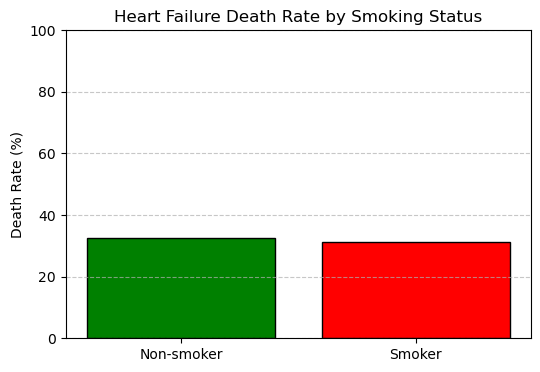

In [24]:
# --- Bar plot ---
plt.figure(figsize=(6,4))
plt.bar(death_rate.index, death_rate.values, color=['green','red'], edgecolor='black')
plt.title('Heart Failure Death Rate by Smoking Status')
plt.ylabel('Death Rate (%)')
plt.ylim(0,100)
plt.grid(axis='y', linestyle='--', alpha=0.7)



 Are there any noticeable patterns in the distribution of death events across different age groups

In [25]:
# Calculate death rate per age group
death_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100

print("Death Rate by Age Group (%):\n")
print(death_rate)


Death Rate by Age Group (%):

age_group
40-49    23.404255
50-59    24.390244
60-69    29.032258
70-79    38.461538
80-89    68.421053
90-99    83.333333
Name: DEATH_EVENT, dtype: float64


C:\Users\shiva\AppData\Local\Temp\ipykernel_29444\506376983.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rate = df.groupby('age_group')['DEATH_EVENT'].mean() * 100


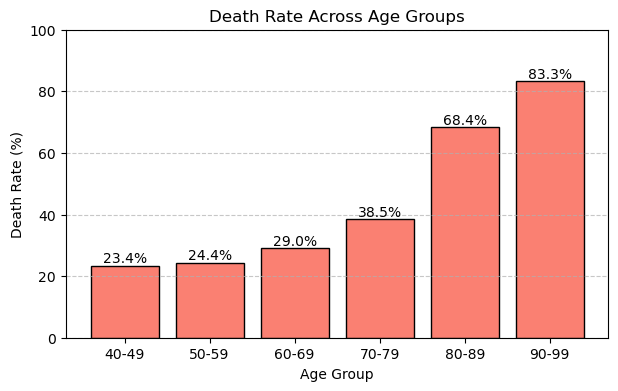

In [26]:
plt.figure(figsize=(7,4))
plt.bar(death_rate.index, death_rate.values, color='salmon', edgecolor='black')
plt.title('Death Rate Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Death Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for i, val in enumerate(death_rate.values):
    if not pd.isna(val):  # skip empty groups
        plt.text(i, val, f"{val:.1f}%", ha='center', va='bottom', fontsize=10)

plt.show()

Is there any significant difference in ejection fraction between patients with and without diabetes

In [27]:
# Split into diabetic and non-diabetic groups
ef_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction']
ef_diabetes = df[df['diabetes'] == 1]['ejection_fraction']


In [28]:
# Descriptive stats
print("Average EF (No Diabetes):", ef_no_diabetes.mean())
print("Average EF (Diabetes):", ef_diabetes.mean())

Average EF (No Diabetes): 38.132183908045974
Average EF (Diabetes): 38.016


In [29]:
# t-test
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(ef_no_diabetes, ef_diabetes, equal_var=False)
print(f"\nT-test results: t = {t_stat:.2f}, p = {p_val:.4f}")



T-test results: t = 0.08, p = 0.9325


<Figure size 600x400 with 0 Axes>

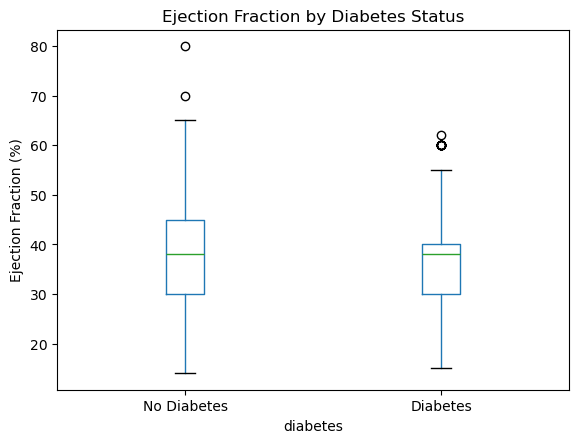

In [30]:
# --- Visualization ---
plt.figure(figsize=(6,4))
df.boxplot(column='ejection_fraction', by='diabetes', grid=False)
plt.xticks([1,2], ['No Diabetes', 'Diabetes'])
plt.title('Ejection Fraction by Diabetes Status')
plt.suptitle('')
plt.ylabel('Ejection Fraction (%)')
plt.show()

How does the serum creatinine level vary between patients who survived and those who did not?

In [31]:
# Separate groups
sc_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
sc_died = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Descriptive stats
print("Average Serum Creatinine (Survived):", sc_survived.mean())
print("Average Serum Creatinine (Died):", sc_died.mean())


Average Serum Creatinine (Survived): 1.1848768472906404
Average Serum Creatinine (Died): 1.8358333333333334


In [32]:
# T-test (only if both groups exist)
if not sc_survived.empty and not sc_died.empty:
    t_stat, p_val = ttest_ind(sc_survived, sc_died, equal_var=False)
    print(f"\nT-test results: t = {t_stat:.2f}, p = {p_val:.4f}")
else:
    print("\n⚠️ No survivors in this dataset snippet, cannot compare groups.")



T-test results: t = -4.15, p = 0.0001


<Figure size 600x400 with 0 Axes>

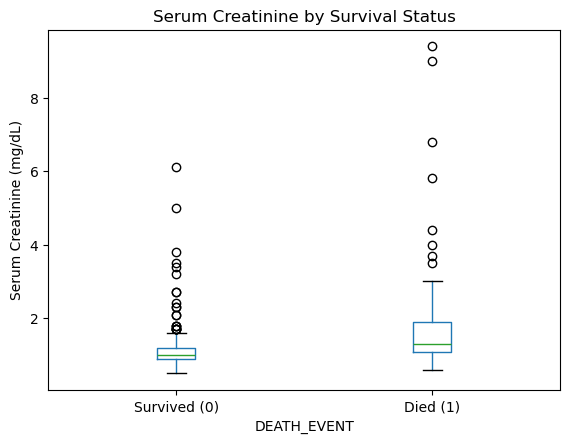

In [33]:
# --- Visualization ---
plt.figure(figsize=(6,4))
df.boxplot(column='serum_creatinine', by='DEATH_EVENT', grid=False)
plt.xticks([1,2], ['Survived (0)', 'Died (1)'])
plt.title('Serum Creatinine by Survival Status')
plt.suptitle('')
plt.ylabel('Serum Creatinine (mg/dL)')
plt.show()

In [34]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000
